In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import searchnets
from searchnets.utils.munge import vsd_results_df

In [2]:
DATA_ROOT = Path('../../../data')
vsd_results_dir = DATA_ROOT.joinpath('results')
vsd_alexnet_results_gz = vsd_results_dir.joinpath(
    'VSD_alexnet_transfer_lr_1e-03_no_finetune/'
    'VSD_alexnet_transfer_lr_1e-03_no_finetune_trained_200_epochs_test_results.gz'
)
vsd_cornet_z_results_gz = vsd_results_dir.joinpath(
    'VSD_CORnet_Z_transfer_lr_1e-03_no_finetune/'
    'VSD_CORnet_Z_transfer_lr_1e-03_no_finetune_trained_200_epochs_test_results.gz'
)

vsd_results_csv_alexnet = DATA_ROOT.joinpath('csv/VSD_alexnet_transfer_lr_1e-03_no_finetune_test.csv')
vsd_results_csv_cornet_z = DATA_ROOT.joinpath('csv/VSD_CORnet_Z_transfer_lr_1e-03_no_finetune_test.csv')

In [3]:
vsd_results_df(results_gz=vsd_cornet_z_results_gz, results_csv_path=vsd_results_csv_cornet_z)
vsd_results_df(results_gz=vsd_alexnet_results_gz, results_csv_path=vsd_results_csv_alexnet)

Using downloaded and verified file: /home/bart/Documents/data/voc/VOCtrainval_11-May-2012.tar


batch 0 of 46:   0%|          | 0/46 [00:07<?, ?it/s]/home/bart/anaconda3/envs/searchnets-torch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
batch 45 of 46: 100%|██████████| 46/46 [00:22<00:00,  2.02it/s]
/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/munge.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vsd_df_test[column_name] = values


Using downloaded and verified file: /home/bart/Documents/data/voc/VOCtrainval_11-May-2012.tar


batch 45 of 46: 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]


,img,difficulty_score,split,f1_score_model_1,acc_model_1,f1_score_model_2,acc_model_2,f1_score_model_3,acc_model_3,f1_score_model_4,...,f1_score_model_5,acc_model_5,f1_score_model_6,acc_model_6,f1_score_model_7,acc_model_7,f1_score_model_8,acc_model_8,mean_f1_score,mean_acc
4,2008_000015,3.709118,test,0.819820,0.95,1.000000,1.00,0.487179,0.95,1.000000,...,0.819820,0.95,0.487179,0.95,0.819820,0.95,0.819820,0.95,0.781705,0.96250
5,2008_000016,4.000782,test,1.000000,1.00,0.487179,0.95,0.819820,0.95,1.000000,...,1.000000,1.00,0.487179,0.95,1.000000,1.00,0.487179,0.95,0.785170,0.97500
8,2008_000023,3.362935,test,0.885714,0.95,0.885714,0.95,0.885714,0.95,0.885714,...,0.885714,0.95,0.885714,0.95,0.885714,0.95,0.885714,0.95,0.885714,0.95000
13,2008_000033,3.159318,test,1.000000,1.00,1.000000,1.00,1.000000,1.00,1.000000,...,1.000000,1.00,1.000000,1.00,1.000000,1.00,1.000000,1.00,1.000000,1.00000
15,2008_000036,3.364060,test,0.722222,0.90,0.722222,0.90,0.722222,0.90,0.722222,...,0.885714,0.95,0.722222,0.90,0.885714,0.95,0.885714,0.95,0.783532,0.91875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11522,2011_003242,3.180000,test,0.885714,0.95,0.722222,0.90,0.722222,0.90,0.657143,...,0.722222,0.90,0.722222,0.90,0.722222,0.90,0.722222,0.90,0.734524,0.90000
11524,2011_003246,3.390000,test,0.657143,0.85,0.803922,0.90,0.657143,0.85,0.885714,...,0.657143,0.85,0.657143,0.85,0.657143,0.85,0.657143,0.85,0.704062,0.86875
11530,2011_003259,3.230000,test,0.885714,0.95,0.885714,0.95,0.885714,0.95,1.000000,...,0.885714,0.95,0.885714,0.95,0.885714,0.95,0.885714,0.95,0.900000,0.95625
11535,2011_003271,2.890000,test,0.487179,0.95,0.487179,0.95,0.487179,0.95,0.487179,...,0.487179,0.95,0.487179,0.95,0.487179,0.95,0.487179,0.95,0.487179,0.95000


In [4]:
vsd_df_alexnet = pd.read_csv(vsd_results_csv_alexnet)

In [7]:
vsd_df_alexnet.columns

Index(['Unnamed: 0', 'img', 'difficulty_score', 'split', 'f1_score_model_1',
       'acc_model_1', 'f1_score_model_2', 'acc_model_2', 'f1_score_model_3',
       'acc_model_3', 'f1_score_model_4', 'acc_model_4', 'f1_score_model_5',
       'acc_model_5', 'f1_score_model_6', 'acc_model_6', 'f1_score_model_7',
       'acc_model_7', 'f1_score_model_8', 'acc_model_8', 'mean_f1_score',
       'mean_acc'],
      dtype='object')

In [18]:
xs = ['acc_model_1', 'acc_model_2',
       'acc_model_3',  'acc_model_4',
       'acc_model_5',  'acc_model_6',
       'acc_model_7',  'acc_model_8',
       'mean_acc']

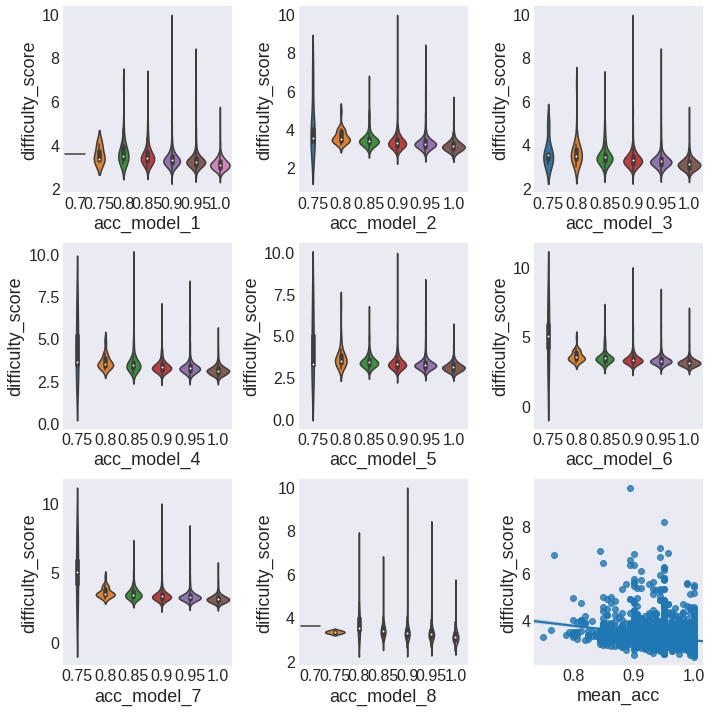

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.ravel()
for ind, x in enumerate(xs):
    if ind != 8:
        sns.violinplot(x=x, y="difficulty_score", data=vsd_df_alexnet, ax=ax[ind]);
    else:
        sns.regplot(x=x, y="difficulty_score", data=vsd_df_alexnet, ax=ax[ind]);

fig.tight_layout()

In [10]:
vsd_df_CORnet_Z = pd.read_csv(vsd_results_csv_cornet_z)

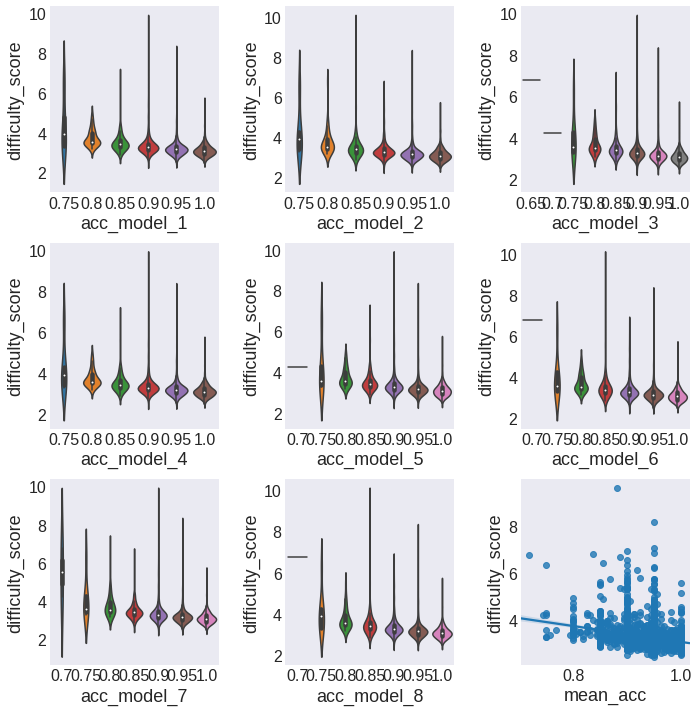

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.ravel()
for ind, x in enumerate(xs):
    if ind != 8:
        sns.violinplot(x=x, y="difficulty_score", data=vsd_df_CORnet_Z, ax=ax[ind]);
    else:
        sns.regplot(x=x, y="difficulty_score", data=vsd_df_CORnet_Z, ax=ax[ind]);

fig.tight_layout()